In [39]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [40]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [41]:
#hyperparameters
input_size = 784 #28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = .001





In [42]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform = transforms.ToTensor(), download = True)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)



In [34]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)


torch.Size([100, 1, 28, 28]) torch.Size([100])


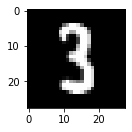

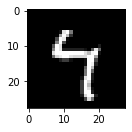

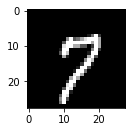

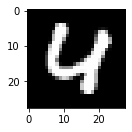

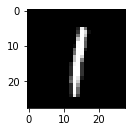

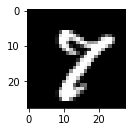

In [43]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0], cmap = 'gray')
  plt.show()

Now we want to classify these, so we will create a fully connected NN with one hidden layer 

In [56]:
#Defining our model 
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out



In [57]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [58]:
#loss and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [61]:
#training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #100, 784
    #reshape images 
    images = images.reshape(-1,28*28).to(device) #push to GPU if possible
    labels = labels.to(device)

    #forwrad 
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backwards
    optimizer.zero_grad() #empty value sin gradient attribute
    loss. backward() #will do backprop
    optimizer.step() #will update the params

    if (i+1)%100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


epoch 1 / 2, step 100/600, loss = 0.4870
epoch 1 / 2, step 200/600, loss = 0.3544
epoch 1 / 2, step 300/600, loss = 0.2829
epoch 1 / 2, step 400/600, loss = 0.1196
epoch 1 / 2, step 500/600, loss = 0.3140
epoch 1 / 2, step 600/600, loss = 0.1572
epoch 2 / 2, step 100/600, loss = 0.3031
epoch 2 / 2, step 200/600, loss = 0.1987
epoch 2 / 2, step 300/600, loss = 0.2163
epoch 2 / 2, step 400/600, loss = 0.1002
epoch 2 / 2, step 500/600, loss = 0.1302
epoch 2 / 2, step 600/600, loss = 0.1631


In [62]:
#testing: 

with torch.no_grad():
  n_correct = 0
  n_samples = 0 
  for images, labels in test_loader:
    images = images.reshape(-1,28*28).to(device) #push to GPU if possible
    labels = labels.to(device)
    outputs = model(images)

    #value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0] #gives the number of samples in the current batch -  should be 100
    n_correct += (predictions == labels).sum().item()



acc = 100.0*n_correct/n_samples 

print(f'accuracy = {acc}')




accuracy = 95.63


95% accuracy ! 